In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math
from IPython.display import display, Markdown
import scipy.stats as stats


In [2]:
df_data = pd.read_csv('../data/12_04_2025_ads.csv')

In [3]:
df_data.head(100)

,id_ad,title,price,location,description,creation_date,scrape_date,bedrooms,living_area,plot_area,...,view_counter,active_flag,seller_name,number_of_ads,link,user_type,active_since,longitude,latitude,delta_flag
0,3000294477,Einfamilienwohnhaus mit Nebengebäude und Garag...,398000.0,63762 Bayern - Großostheim,NaN,2025-03-12,2025-03-30 14:00:05.181159,4.0,152.0,641.0,...,2352,False,Golden Home Real LTD & Co KG - Lepeschka Günther,194.0,https://www.kleinanzeigen.de/s-anzeige/einfami...,NaN,NaN,9.071499,49.921092,True
1,2987288057,"Dein EFH, mit Bodenplatte , Küche und Sonderda...",551673.0,63773 Bayern - Goldbach,NaN,2025-01-27,2025-02-13 14:00:27.943278,2.0,130.0,360.0,...,130,False,Gülsen Akay - Freie Handelsvertretung der Livi...,200.0,https://www.kleinanzeigen.de/s-anzeige/dein-ef...,Gewerblicher Nutzer,2024-05-14,9.174041,50.011228,True
2,2987287793,"EFH alles inklusive, das gibt´s nur bei Living...",803703.0,63814 Bayern - Mainaschaff,NaN,2025-01-27,2025-02-13 14:00:26.798687,3.0,125.0,798.0,...,247,False,Gülsen Akay - Freie Handelsvertretung der Livi...,200.0,https://www.kleinanzeigen.de/s-anzeige/efh-all...,Gewerblicher Nutzer,2024-05-14,9.088705,49.984353,True
3,2421546172,"Einfamilienhaus, freistehend, ruhige Lage",490000.0,63533 Hessen - Mainhausen,Objektbeschreibung Das Einfamilienhaus besteht...,2024-09-14,2025-04-12 16:07:42.623476,NaN,132.0,600.0,...,8722,True,Ellen Lindner,7.0,https://www.kleinanzeigen.de/s-anzeige/einfami...,Privater Nutzer,2013-03-13,9.015004,50.013414,True
4,2987287968,Gewöhnlich war gestern! Dein Haus für Individu...,636055.0,63849 Bayern - Leidersbach,NaN,2025-01-27,2025-02-13 14:00:27.318961,4.0,191.0,1750.0,...,126,False,Gülsen Akay - Freie Handelsvertretung der Livi...,200.0,https://www.kleinanzeigen.de/s-anzeige/gewoehn...,Gewerblicher Nutzer,2024-05-14,9.241359,49.892105,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2970169514,Dein neues zu Hause für Dich und Deine 3 Kinder,495709.0,63849 Bayern - Leidersbach,# Objektbeschreibung<br />SUNSHINE 167<br />Du...,2025-01-08,2025-01-27 06:00:16.949778,5.0,167.0,1750.0,...,239,False,Gülsen Akay - Freie Handelsvertretung der Livi...,187.0,https://www.kleinanzeigen.de/s-anzeige/dein-ne...,Gewerblicher Nutzer,2024-05-14,9.241359,49.892105,True
96,3053873650,NEU - Ihr neues Reihenendhaus mit Dachterrasse,549900.0,63791 Bayern - Karlstein,# OBJEKTBESCHREIBUNG Nur wenige Fußminuten von...,2025-04-10,2025-04-12 16:07:57.827947,3.0,145.0,132.0,...,26,True,Trimborn und Best Bau- und Immobilien GmbH & C...,6.0,https://www.kleinanzeigen.de/s-anzeige/neu-ihr...,NaN,NaN,9.040375,50.046116,True
97,2970169711,Genieße die Sonnenseite des Lebens!,582165.0,63773 Bayern - Goldbach,# Objektbeschreibung<br />SUNSHINE 154<br />Di...,2025-01-08,2025-01-27 06:00:16.98432,3.0,153.0,360.0,...,252,False,Gülsen Akay - Freie Handelsvertretung der Livi...,187.0,https://www.kleinanzeigen.de/s-anzeige/geniess...,Gewerblicher Nutzer,2024-05-14,9.174041,50.011228,True
98,2895677109,Modernes Einfamilienhaus auf Bodenplatte - tec...,329890.0,63849 Bayern - Leidersbach,# Objektbeschreibung<br />Willkommen in Ihrem ...,2025-01-16,2025-01-27 21:06:28.970794,3.0,124.0,343.0,...,378,False,allkauf haus GmbH - Vitali Stettinger,2135.0,https://www.kleinanzeigen.de/s-anzeige/moderne...,Gewerblicher Nutzer,2017-10-17,9.241359,49.892105,True


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_ad          724 non-null    int64  
 1   title          724 non-null    object 
 2   price          711 non-null    float64
 3   location       724 non-null    object 
 4   description    411 non-null    object 
 5   creation_date  724 non-null    object 
 6   scrape_date    724 non-null    object 
 7   bedrooms       564 non-null    float64
 8   living_area    724 non-null    float64
 9   plot_area      675 non-null    float64
 10  rooms          677 non-null    float64
 11  bathrooms      632 non-null    float64
 12  floors         589 non-null    float64
 13  commission     696 non-null    object 
 14  house_type     682 non-null    object 
 15  year_built     463 non-null    float64
 16  view_counter   724 non-null    int64  
 17  active_flag    724 non-null    bool   
 18  seller_nam

In [5]:
def data_overview(data, target):
    # Overview
    display(Markdown("## Data Overview"))
    
    display(Markdown("### General Information"))
    display(Markdown(f"- Number of rows and columns: {data.shape[0]} x {data.shape[1]}"))
    display(Markdown("- Column names:"))
    display(list(data.columns))

    display(Markdown("### Data Types & Missing Values"))
    missing = data.isnull().sum()
    dtypes = pd.DataFrame(data.dtypes, columns=["Data Type"])
    missing_df = pd.DataFrame(missing, columns=["Missing Values"])
    overview_df = dtypes.join(missing_df)
    display(overview_df.style.background_gradient(cmap="coolwarm"))

    display(Markdown("### Classic head of Data"))
    display(data.head().style.set_properties(**{"background-color": "#f5f5f5"}))

    display(Markdown("### Statistical Summary (describe)"))
    display(data.describe().T.style.background_gradient(cmap="viridis"))

    # Target variable analysis
    display(Markdown(f"## Target Variable: `{target}`"))
    sns.set_style("whitegrid")  
    sns.set_palette("viridis")   

    if target in data.columns:
        fig, ax = plt.subplots(1, 2, figsize=(14, 5))

        sns.histplot(data[target], bins=30, kde=True, ax=ax[0])
        ax[0].set_title("Absolute Frequency", fontsize=12, fontweight="bold")
        ax[0].set_ylabel("Count")
        ax[0].set_xlabel(target)
        ax[0].grid(axis="y", linestyle="--", alpha=0.5)


        # Percentage distribution barplot
        # Prepare percentage distribution as DataFrame
        percentages = data[target].value_counts(normalize=True).reset_index()
        percentages.columns = [target, "percentage"]

        sns.barplot(x=target, y="percentage", data=percentages, ax=ax[1])
    


        ax[1].set_title("Percentage Distribution", fontsize=12, fontweight="bold")
        ax[1].set_ylabel("Percentage")
        ax[1].set_xlabel(target)
        ax[1].grid(axis="y", linestyle="--", alpha=0.5)

        

        for spine in ["top", "right"]:
            ax[0].spines[spine].set_visible(False)
            ax[1].spines[spine].set_visible(False)

    plt.tight_layout()
    plt.show()

## Data Overview

### General Information

- Number of rows and columns: 724 x 26

- Column names:

['id_ad',
 'title',
 'price',
 'location',
 'description',
 'creation_date',
 'scrape_date',
 'bedrooms',
 'living_area',
 'plot_area',
 'rooms',
 'bathrooms',
 'floors',
 'commission',
 'house_type',
 'year_built',
 'view_counter',
 'active_flag',
 'seller_name',
 'number_of_ads',
 'link',
 'user_type',
 'active_since',
 'longitude',
 'latitude',
 'delta_flag']

### Data Types & Missing Values

,Data Type,Missing Values
id_ad,int64,0
title,object,0
price,float64,13
location,object,0
description,object,313
creation_date,object,0
scrape_date,object,0
bedrooms,float64,160
living_area,float64,0
plot_area,float64,49


### Classic head of Data

,id_ad,title,price,location,description,creation_date,scrape_date,bedrooms,living_area,plot_area,rooms,bathrooms,floors,commission,house_type,year_built,view_counter,active_flag,seller_name,number_of_ads,link,user_type,active_since,longitude,latitude,delta_flag
0,3000294477,Einfamilienwohnhaus mit Nebengebäude und Garage im OT Pflaumheim,398000.000000,63762 Bayern - Großostheim,nan,2025-03-12,2025-03-30 14:00:05.181159,4.000000,152.000000,641.000000,6.000000,1.000000,2.000000,Mit Provision,Einfamilienhaus freistehend,1930.000000,2352,False,Golden Home Real LTD & Co KG - Lepeschka Günther,194.000000,https://www.kleinanzeigen.de/s-anzeige/einfamilienwohnhaus-mit-nebengebaeude-und-garage-im-ot-pflaumheim/3000294477-208-7416,nan,nan,9.071499,49.921092,True
1,2987288057,"Dein EFH, mit Bodenplatte , Küche und Sonderdarlehen",551673.000000,63773 Bayern - Goldbach,nan,2025-01-27,2025-02-13 14:00:27.943278,2.000000,130.000000,360.000000,4.000000,1.000000,2.000000,Keine zusätzliche Käuferprovision,Einfamilienhaus freistehend,nan,130,False,Gülsen Akay - Freie Handelsvertretung der Living Fertighaus GmbH - Handelsvertretung der Living Fert,200.000000,https://www.kleinanzeigen.de/s-anzeige/dein-efh-mit-bodenplatte-kueche-und-sonderdarlehen/2987288057-208-7439,Gewerblicher Nutzer,2024-05-14,9.174041,50.011228,True
2,2987287793,"EFH alles inklusive, das gibt´s nur bei Livinghaus",803703.000000,63814 Bayern - Mainaschaff,nan,2025-01-27,2025-02-13 14:00:26.798687,3.000000,125.000000,798.000000,4.000000,1.000000,2.000000,Keine zusätzliche Käuferprovision,Einfamilienhaus freistehend,nan,247,False,Gülsen Akay - Freie Handelsvertretung der Living Fertighaus GmbH - Handelsvertretung der Living Fert,200.000000,https://www.kleinanzeigen.de/s-anzeige/efh-alles-inklusive-das-gibt-s-nur-bei-livinghaus/2987287793-208-7435,Gewerblicher Nutzer,2024-05-14,9.088705,49.984353,True
3,2421546172,"Einfamilienhaus, freistehend, ruhige Lage",490000.000000,63533 Hessen - Mainhausen,"Objektbeschreibung Das Einfamilienhaus besteht aus zwei Etagen. Im Erdgeschoss befinden sich eine Küche, das Wohn-Esszimmer, ein Arbeitszimmer und ein Gäste-WC. Über den Flur gelangt man in die obere Etage und in den Keller. In der oberen Etage befindet sich das Badezimmer, ein großes Schlafzimmer, zwei Kinderzimmer, ein Ankleidezimmer sowie eine kleine Abstellkammer. Über eine Zugtreppe erreicht man den Dachboden, der als Speicher genutzt werden kann. Der Keller bietet einen Heizungsraum, drei weitere Abstellräume sowie eine Waschküche mit Zugang zum Hof. Ebenfalls zur Verfügung stehen eine Garage, ein Carport und ein Gartenhaus. Sonstiges -Glasfaseranschluss -renovierungsbedürftig Energie Energieausweis: Energiebedarfsausweis Energiebedarf: 395 kWh (m²-a) Gültig bis: 20.03.2033 Heizungsart: Zentralheizung Wesentliche Energieträger: Gas Lage Dieses Einfamilienhaus befindet sich am ruhigen Ortsrand von Zellhausen. Die idyllische Lage in direkter Nähe zum Wald lädt zu entspannten Spaziergängen und Fahrradtouren in Richtung Aschaffenburg und Babenhausen ein. Der Ortsteil von Mainhausen in Kreis Offenbach im Rhein-Main-Gebiet bietet eine breite Palette an Freizeitaktivitäten und Erholungsmöglichkeiten, wie beispielsweise Vereine, Fußball- und Tennisplätze sowie Badeseen. Im Ort selbst sind Einkaufsmöglichkeiten, Kindergärten, Grundschule, eine Freie - Schule, Ärzte und eine Apotheke vorhanden. Die ausgezeichnete Anbindung an die Autobahnen A3 und A45 ermöglicht eine bequeme und schnelle Fahrt in Richtung Frankfurt oder Aschaffenburg. Der Frankfurter Flughafen ist in nur 35 Minuten erreichbar und Aschaffenburg liegt nur 15 Minuten entfernt. Nur drei Kilometer entfernt befindet sich die malerische Altstadt von Seligenstadt, die mit einer Vielzahl an Einkaufsmöglichkeiten, Restaurants und weiterführenden Schulen aufwartet. Dieses Haus ist somit der ideale Ort für Menschen, die ein ruhiges und komfortables Leben in einer naturnahen Umgebung mit hervorragender Anbindung an die umliegenden Städt

### Statistical Summary (describe)

,count,mean,std,min,25%,50%,75%,max
id_ad,724.000000,2968276239.277624,96883195.093126,2408123578.000000,2957050788.750000,3000145864.000000,3026655045.000000,3054996442.000000
price,711.000000,623959.227848,282871.309884,1.000000,449000.000000,566767.000000,749000.000000,2190000.000000
bedrooms,564.000000,3.703901,1.803663,0.000000,3.000000,3.000000,4.000000,24.000000
living_area,724.000000,176.948895,81.880839,0.000000,126.000000,153.500000,205.000000,897.000000
plot_area,675.000000,706.888889,1606.386434,1.000000,350.000000,470.000000,735.000000,34800.000000
rooms,677.000000,5.929099,2.657633,1.000000,4.000000,5.000000,7.000000,24.000000
bathrooms,632.000000,1.792722,1.334562,1.000000,1.000000,1.000000,2.000000,23.000000
floors,589.000000,2.173175,0.606563,0.000000,2.000000,2.000000,2.000000,5.000000
year_built,463.000000,1985.498920,41.973651,1732.000000,1960.000000,1993.000000,2025.000000,2025.000000
view_counter,724.000000,1238.776243,2159.224038,4.000000,151.000000,394.500000,1453.000000,23228.000000


## Target Variable: `price`

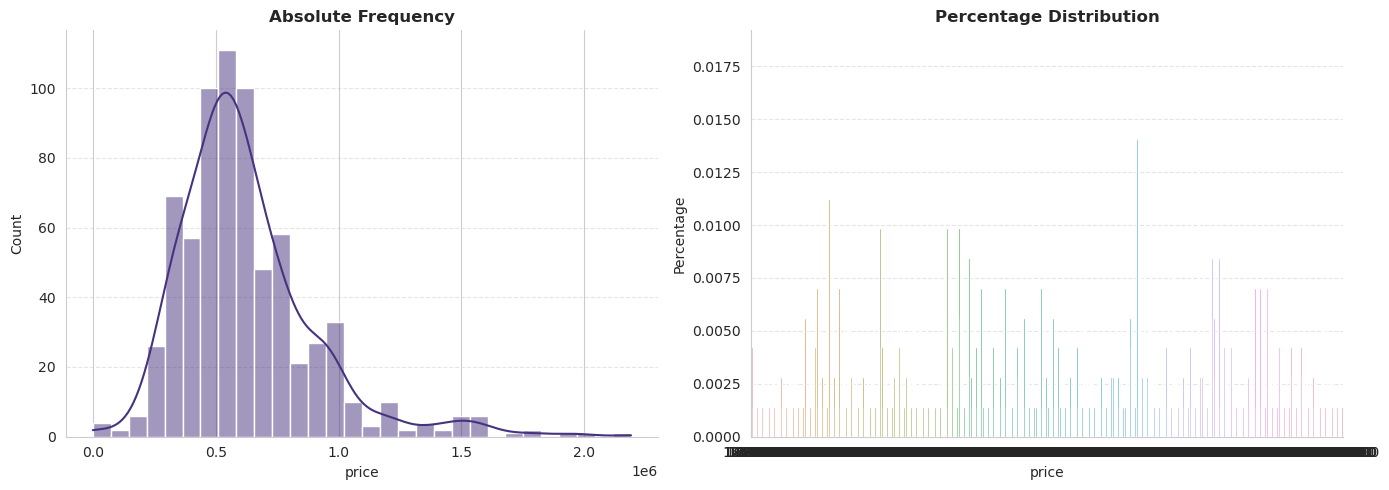

In [6]:
data_overview(df_data, "price")